시각화 유형	설명

countplot	범주형 변수 빈도수 막대그래프 (예: 성별, 혈압 이상 유무)

barplot	평균값 막대그래프 (수치형 y, 범주형 x)

boxplot	수치 분포 + 이상치

pie chart	비율 비교 (주로 이진 분류에서 시각적으로 표현)

heatmap	상관관계 시각화

violinplot	분포 + 밀도 결합 시각화

scatterplot	두 연속형 변수 간 관계 (e.g., Age vs Blood Pressure)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv'
df = pd.read_csv(url)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [3]:
# 데이터 앞부분 확인
print("\n데이터 미리보기:")
print(df.head())


데이터 미리보기:
   Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3               4                           0                11.00   
4               5                           1                14.17   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                          0.90   34   23    1        1.0        0   
1                          0.23   54   33    1        NaN        0   
2                          0.91   70   49    0        NaN        0   
3                          0.43   71   50    0        NaN        0   
4                          0.83   52   19    0        NaN        0   

   Physical_activity  salt_content_in_the_diet  alcohol_consumption_per_day  \
0              45961                     48071                      

In [4]:
# 1-1. 결측치 처리 (각 컬럼 중앙값으로 대체)
df = df.fillna(df.median())
print("\nMissing Values after fillna:")
print(df.isnull().sum())


Missing Values after fillna:
Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


In [5]:
# 1-2. 기초 통계량 확인 (수치형 변수)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nDescriptive Statistics for Numeric Columns:")
print(df[numeric_cols].describe())


Descriptive Statistics for Numeric Columns:
       Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
count     2000.000000                 2000.000000          2000.000000   
mean      1000.500000                    0.493500            11.710035   
std        577.494589                    0.500083             2.186701   
min          1.000000                    0.000000             8.100000   
25%        500.750000                    0.000000            10.147500   
50%       1000.500000                    0.000000            11.330000   
75%       1500.250000                    1.000000            12.945000   
max       2000.000000                    1.000000            17.560000   

       Genetic_Pedigree_Coefficient          Age          BMI          Sex  \
count                   2000.000000  2000.000000  2000.000000  2000.000000   
mean                       0.494595    46.558500    30.081500     0.496000   
std                        0.284945    17.107832    11

In [6]:
# 2. 범주형 변수 식별
# object형 변수 외에도, 고유값(unique)이 10개 미만인 수치형 변수를 범주형으로 간주 (예: Blood_Pressure_Abnormality, Sex 등)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in numeric_cols:
    if df[col].nunique() < 10:
        categorical_cols.append(col)
categorical_cols = list(set(categorical_cols))
print("\nIdentified Categorical Columns:")
print(categorical_cols)


Identified Categorical Columns:
['Chronic_kidney_disease', 'Smoking', 'Adrenal_and_thyroid_disorders', 'Blood_Pressure_Abnormality', 'Sex', 'Pregnancy', 'Level_of_Stress']


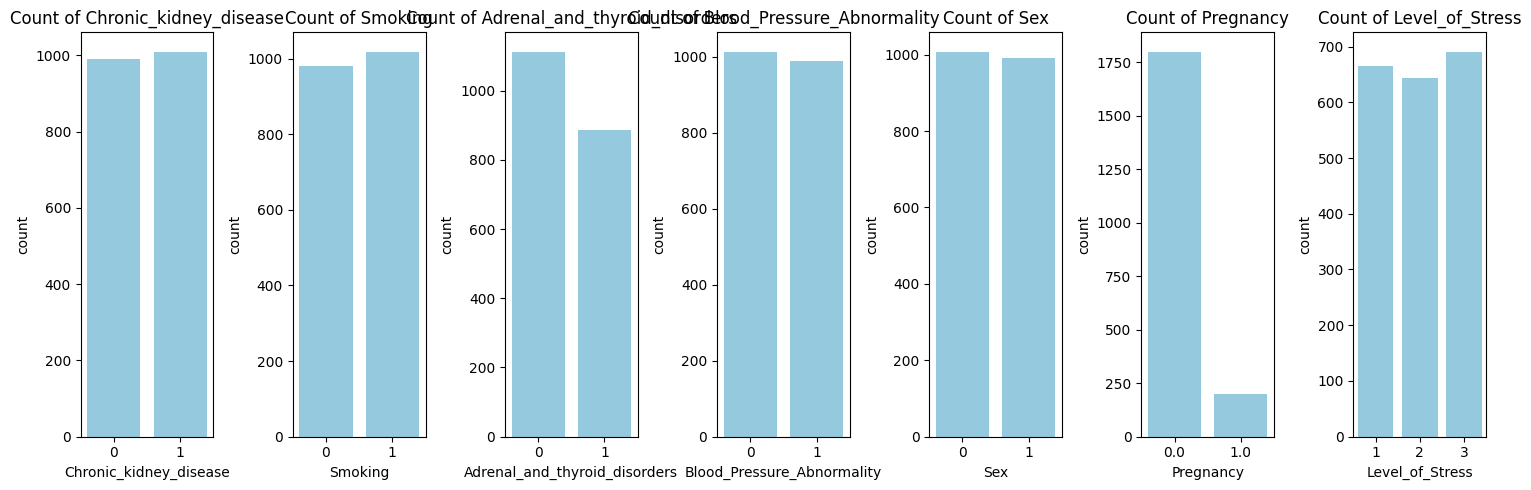

In [7]:
###################################
# 3. Countplot: 범주형 변수 빈도수 막대그래프
###################################
# 범주형 변수가 있으면 각각의 빈도수 확인
if len(categorical_cols) > 0:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(categorical_cols):
        plt.subplot(1, len(categorical_cols), i+1)
        sns.countplot(data=df, x=col, color="skyblue")
        plt.title(f"Count of {col}")
    plt.tight_layout()
    plt.show()
else:
    print("범주형 변수가 없습니다.")

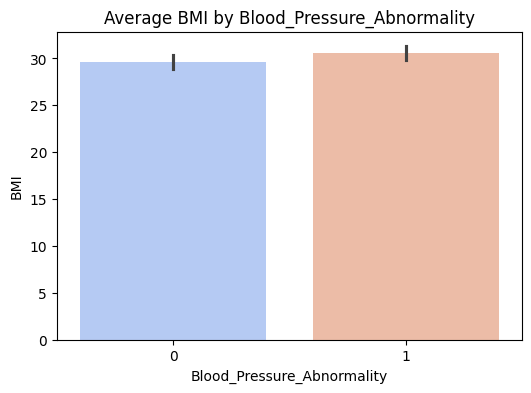

In [8]:
###################################
# 4. Barplot: 범주형 x, 수치형 y 평균막대그래프
###################################
if "Blood_Pressure_Abnormality" in df.columns and "BMI" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x="Blood_Pressure_Abnormality", y="BMI", data=df, 
                hue="Blood_Pressure_Abnormality", palette="coolwarm", legend=False)
    plt.title("Average BMI by Blood_Pressure_Abnormality")
    plt.show()

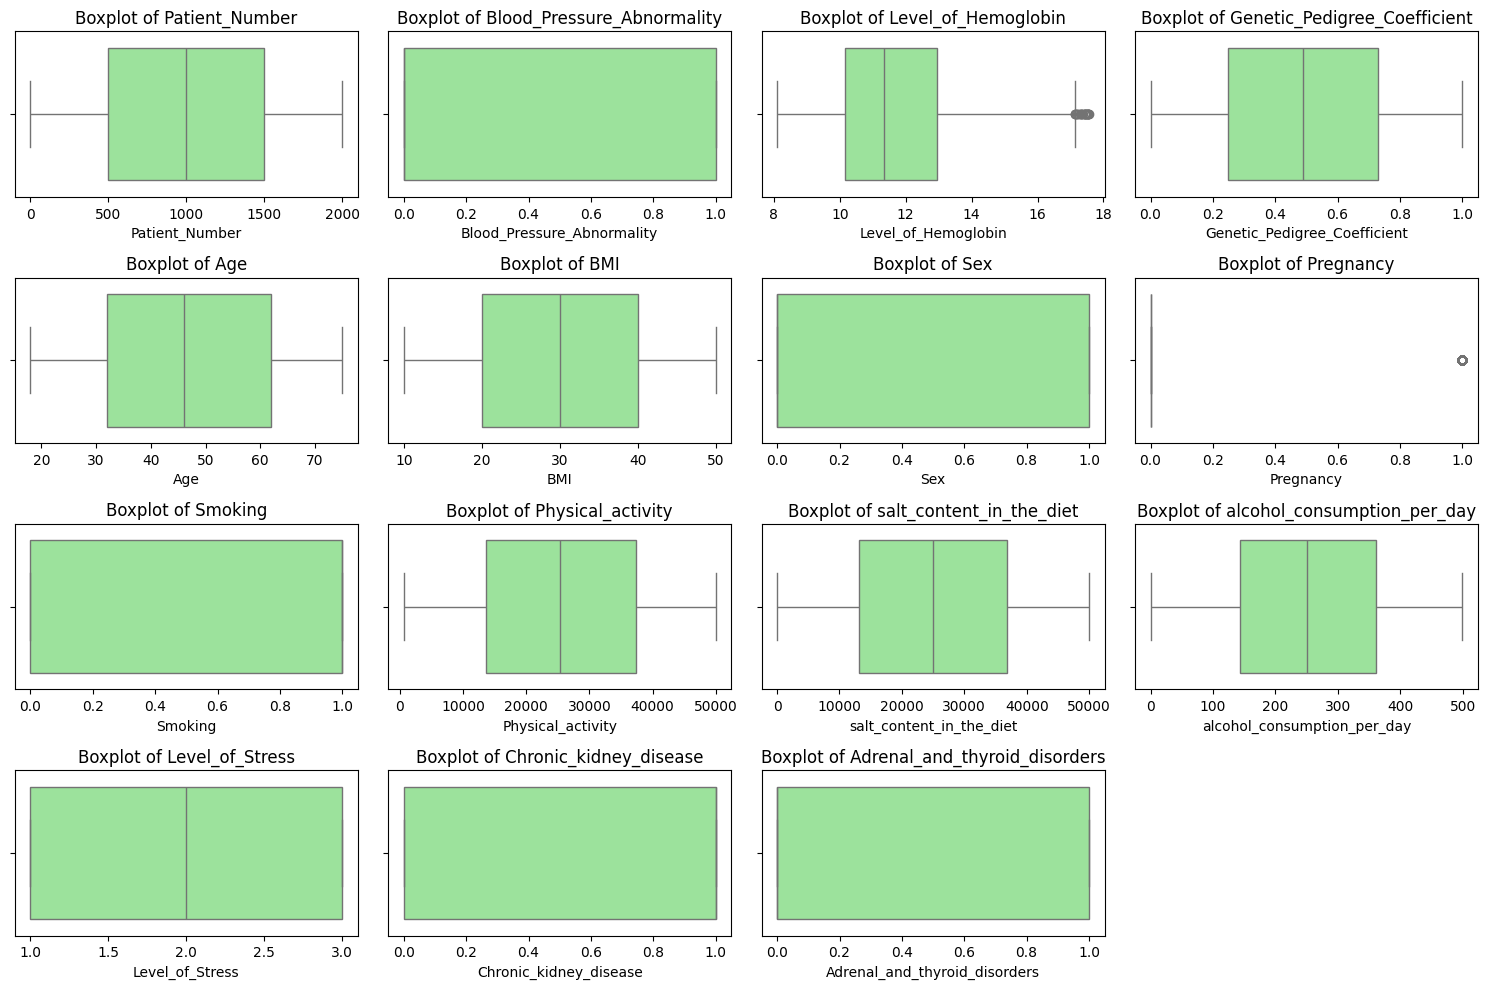

In [9]:
###################################
# 5. Boxplot: 수치형 변수 분포 + 이상치
###################################
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

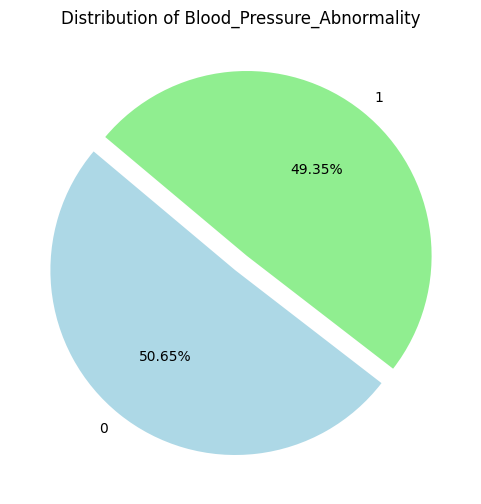

In [10]:
###################################
# 6. Pie Chart: 범주형 변수 비율 비교
###################################
# 예: Blood_Pressure_Abnormality의 비율을 파이차트로 표시
if "Blood_Pressure_Abnormality" in df.columns:
    bp_counts = df["Blood_Pressure_Abnormality"].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(bp_counts, labels=bp_counts.index, autopct="%0.2f%%", colors=["lightblue", "lightgreen"],
            explode=(0.05, 0.05), startangle=140)
    plt.title("Distribution of Blood_Pressure_Abnormality")
    plt.show()

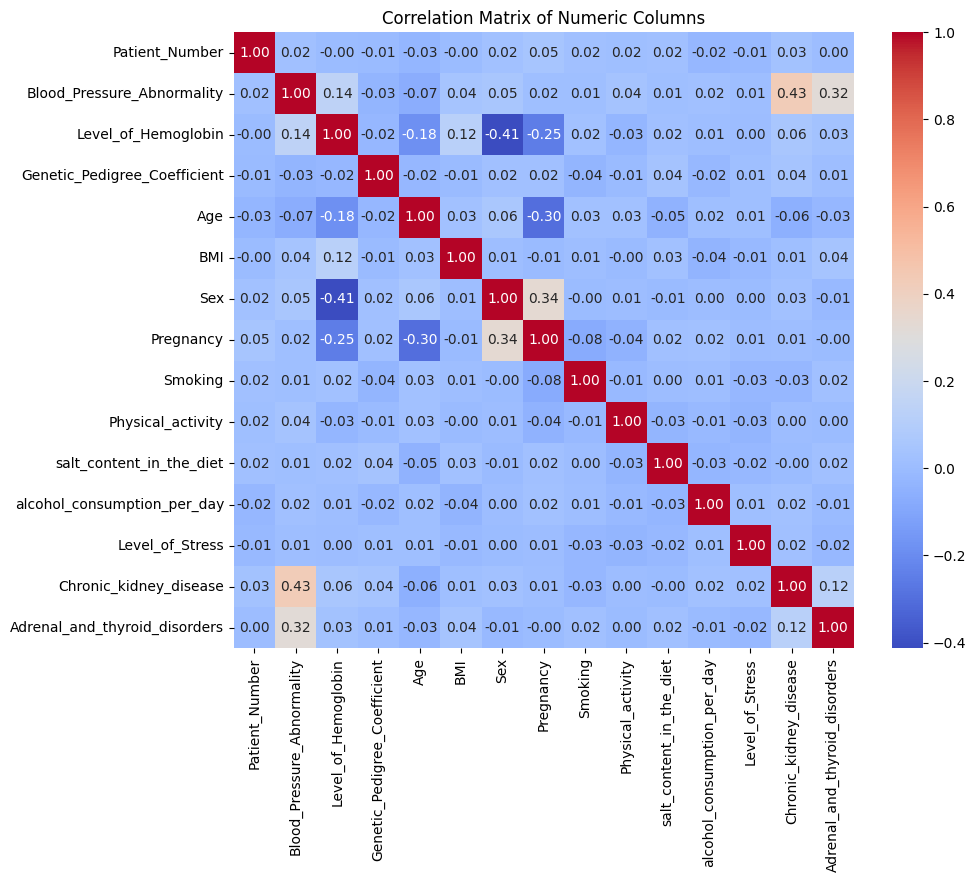

In [11]:
###################################
# 7. Heatmap: 상관관계 행렬 시각화
###################################
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

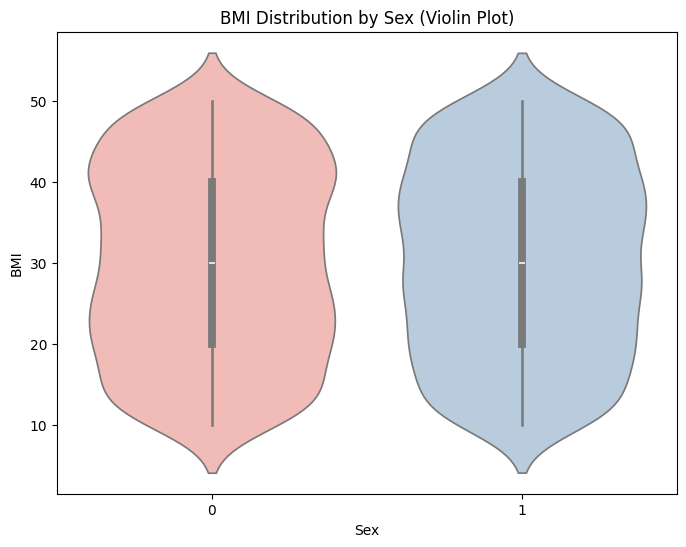

In [12]:
###################################
# 8. Violinplot: 분포 + 밀도 시각화
###################################
if "Sex" in df.columns and "BMI" in df.columns:
    plt.figure(figsize=(8,6))
    sns.violinplot(x="Sex", y="BMI", data=df, 
                   hue="Sex", palette="Pastel1", legend=False)
    plt.title("BMI Distribution by Sex (Violin Plot)")
    plt.show()

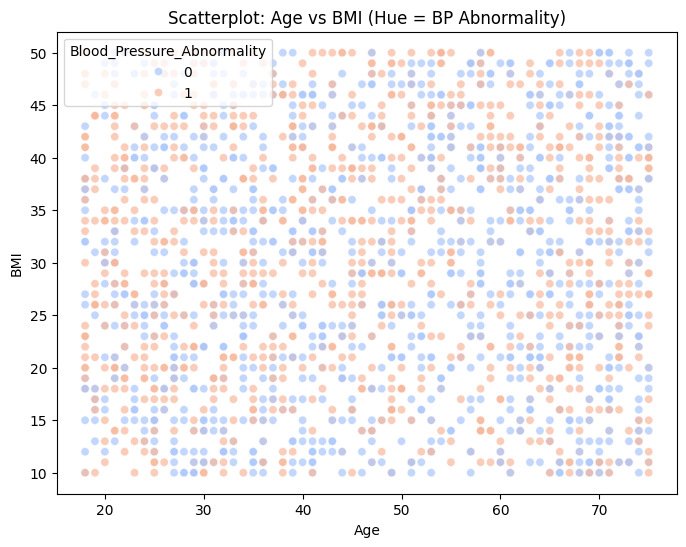

In [13]:
###################################
# 9. Scatterplot: 두 연속형 변수 간 관계
###################################
# 예: Age와 BMI의 관계, Blood_Pressure_Abnormality를 hue로 지정하여 구분
if "Age" in df.columns and "BMI" in df.columns and "Blood_Pressure_Abnormality" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="Age", y="BMI", data=df, hue="Blood_Pressure_Abnormality", palette="coolwarm", alpha=0.7)
    plt.title("Scatterplot: Age vs BMI (Hue = BP Abnormality)")
    plt.show()